In [53]:
#import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
df1={'cgpa':[6.7,6.8,8.4,9.8,7.7,7.0,8.3,6.8,8.9,8.57],
     'iq':[100,89,115,99,103,130,126,90,119,135],
     'package':[3.5,5,8,15,8,9,13,6,18,20]}
df=pd.DataFrame(df1)

#split the data into training and testing sets
X = df.drop(columns='iq')
y = df['iq']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

df.head()

,cgpa,iq,package
0,6.7,100,3.5
1,6.8,89,5.0
2,8.4,115,8.0
3,9.8,99,15.0
4,7.7,103,8.0


In [55]:
#create linear regression model and fit it on the training data
mlr = LinearRegression()
mlr.fit(X_train,Y_train)

LinearRegression()

In [56]:
#get the slope and intercept of the linear regression line
m = mlr.coef_
c = mlr.intercept_

print('slope =', m, "\nand intercept =", c)

slope = [-8.84059062  2.85809066] 
and intercept = 152.44743645296498


In [57]:
#predict the grades for the training data
Y_pred_train = mlr.predict(X_train)
Y_pred_train

array([116.28611801, 103.21879658, 109.47996416, 101.05120048,
       108.68100821, 116.22571283, 133.84538798, 125.21181175])

In [58]:
#calculate the R-squared score for the training data
r2_train = r2_score(Y_train, Y_pred_train)
r2_train

0.46249124432127897

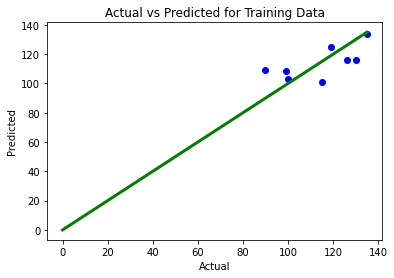

In [59]:
#plot a scatter plot of actual vs predicted grades for the training data
plt.scatter(Y_train, Y_pred_train, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Training Data')
x = np.linspace(0, np.max(Y_train))
plt.plot(x, x, color='green', linewidth=3)
plt.show()

In [60]:
#predict the grades for the testing data
Y_pred_test = mlr.predict(X_test)
Y_pred_test

array([107.23961392, 106.6218735 ])

In [61]:
#calculate the R-squared score for the testing data
r2_test = r2_score(Y_test, Y_pred_test)
r2_test

-2.352089304452769

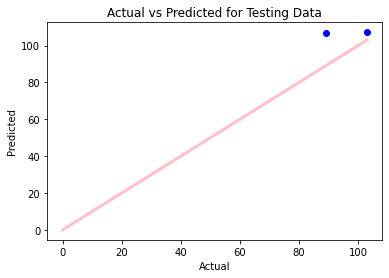

In [62]:
#plot a scatter plot of actual vs predicted grades for the testing data
plt.scatter(Y_test, Y_pred_test, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Testing Data')
x = np.linspace(0, np.max(Y_test))
plt.plot(x, x, color='pink', linewidth=3)
plt.show()

In [63]:
#predict the output for a new datapoint
new_data = [[7.7,200]]
new_prediction = mlr.predict(new_data)
new_prediction

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([655.99302037])

In [64]:
#create a DataFrame to compare the actual vs predicted values
pred_df = pd.DataFrame({
    'Actual Value': Y_test.ravel(),
    'Predicted Value': Y_pred_test.ravel(),
    'Difference': (Y_test - Y_pred_test).ravel()
})

In [65]:
#print the DataFrame and R-squared scores for both training and testing data
print(pred_df.head())
print(f'R-squared score for training data: {r2_train}')
print(f'R-squared score for testing data: {r2_test}')

   Actual Value  Predicted Value  Difference
0           103       107.239614   -4.239614
1            89       106.621874  -17.621874
R-squared score for training data: 0.46249124432127897
R-squared score for testing data: -2.352089304452769


In [66]:
 #calculate Mean Absolute Error using inbuilt function
mae_inbuilt = mean_absolute_error(Y_test, Y_pred_test)
mae_inbuilt

10.930743708077301

In [67]:
#calculate Mean Squared Error using inbuilt function
mse_inbuilt = mean_squared_error(Y_test, Y_pred_test)
mse_inbuilt

164.2523759181857

In [68]:
#calculate Sum of Squared Residuals
ssr = ((Y_pred_test - Y_test)**2).sum()
ssr

328.5047518363714